In [176]:
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from  pathlib import Path
import projet3
from projet3 import utils


# TODO: demander à l'utilisateur la quantité de chaque produit
# TODO: sur la quantité de chaque produit refaire les ratios
# TODO: Camenbert apport d'energie par macro nutriment

columns_mg = ["vitamin-a_100g", "vitamin-c_100g", "iron_100g"]

def get_kcal(sample):
    new_sample = sample.copy()
    new_sample["lipide"] = (
            (new_sample["fat_100g"] + 
             new_sample["saturated-fat_100g"] + 
             new_sample["cholesterol_100g"] + 
             new_sample["trans-fat_100g"]) * 9)
    new_sample["glucide"] = (
            (new_sample["sugars_100g"] + 
             new_sample["carbohydrates_100g"]) * 4)
    new_sample["proteine"] = (new_sample["proteins_100g"] * 4)
    new_sample["alcohol"] = (new_sample["alcohol_100g"] * 4)
    return new_sample[["lipide", "glucide", "proteine", "alcohol"]]


def get_metrics(data, codes, columns):
    # faire le ratio, 
    quantity = data["serving_quantity"]
    
    for c in columns_mg:
        data[c] *= 1000
    sum_ = data[columns].mean()
    return sum_
    
def get_reference(data, columns):
    # TODO les donnes doivent etre cleanés
    reference = data[data["nutrition_grade_fr"] == "a"]
    # nutrition_score, nutrition_score_uk 
    #reference = reference[utils.make_filter(reference, *columns)]
    for c in columns:
        reference = reference[(reference[c] <= 100)&(reference[c]>=0)]
    for c in columns_mg:
        reference[c] *= 1000
    return reference[columns].mean()
    
def plot_radar(current_data):
    labels = columns
    fig = plt.figure()
    stats_ = current_data
    
    angles=np.linspace(0, 2*np.pi, len(columns), endpoint=False)
    
    stats = np.concatenate((stats_,[stats_[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    name = "Composition"
    ax.set_title(name)
    ax.grid(True)

In [177]:
# les colonnes retenues
columns = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 
           'carbohydrates_100g', 'proteins_100g','salt_100g',  
           'sodium_100g', 'calcium_100g', 'cholesterol_100g',
           'trans-fat_100g', 'iron_100g', 'vitamin-c_100g', 
           'vitamin-a_100g', 'alcohol_100g']

In [178]:
data_folder = Path(projet3.__file__).with_name("data")
results_folder = Path(projet3.__file__).with_name("results")

data = data_folder / "en.openfoodfacts.org.products.csv"
data_df = pd.read_csv(data.as_posix(), sep="\t")
data_for_ref = pd.read_csv(results_folder.joinpath("complete_data.csv"))


/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [179]:
# Aliment de refernce nutiscore à A
#TODO: sur quel sour

In [180]:
data_df.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07T18:34:40Z,1544207683,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000284,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1547120245,2019-01-10T11:37:25Z,1563551052,2019-07-19T15:44:12Z,Pain maïs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000970,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506368,2018-03-08T10:52:48Z,1561463726,2019-06-25T11:55:26Z,Fromage blanc aux myrtilles,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
sample = data_df.sample(5)
codes = sample["code"]
sum_ = sample.sum()

# Analyse de la composition d'un repas, composé de plusiuers produits

In [182]:
reference = get_reference(data_df, columns)

In [183]:
reference

fat_100g               4.874375
saturated-fat_100g     0.682625
sugars_100g            4.771250
carbohydrates_100g    28.481250
proteins_100g          7.510625
salt_100g              0.569830
sodium_100g            0.042448
calcium_100g           0.077287
cholesterol_100g       0.139706
trans-fat_100g         0.025000
iron_100g              1.586375
vitamin-c_100g         4.808688
vitamin-a_100g         0.166063
alcohol_100g           0.000000
dtype: float64

## Données brutes

In [184]:
sample[["product_name"]]

,product_name
15517,Yellow Kernels Popcorn
896881,Thon Au Jalapeño
911182,Agua mineral natural manantial Fuente Arquillo
720994,Bolognese cooking sauce
529611,Raisin nectar


In [185]:
metrics_brut = get_metrics(sample, codes=list(codes), columns=columns)
metrics_brut

fat_100g               1.520000
saturated-fat_100g     1.800000
sugars_100g            6.275000
carbohydrates_100g    30.610000
proteins_100g          7.940000
salt_100g              0.491510
sodium_100g            0.196604
calcium_100g                NaN
cholesterol_100g       0.000000
trans-fat_100g         0.000000
iron_100g                   NaN
vitamin-c_100g              NaN
vitamin-a_100g              NaN
alcohol_100g                NaN
dtype: float64

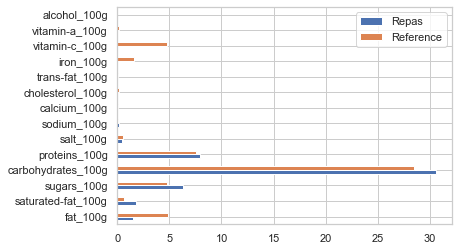

In [186]:
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
data_metrics = pd.DataFrame({"Repas": metrics_brut, "Reference": reference})
data_metrics.plot.barh()
plt.show()

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


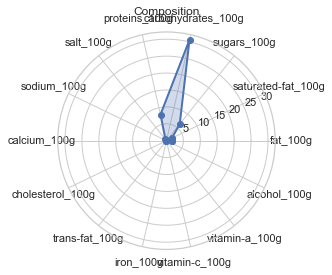

In [187]:
plot_radar(metrics_brut)


## Données relatives

In [188]:
relative_metrics = metrics_brut / reference

sns.set_color_codes("pastel")
sns.set(style="whitegrid")

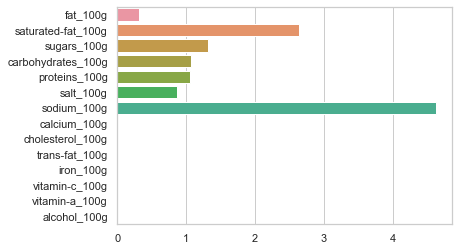

In [189]:
sns.barplot(y=relative_metrics.index, x=relative_metrics.values)

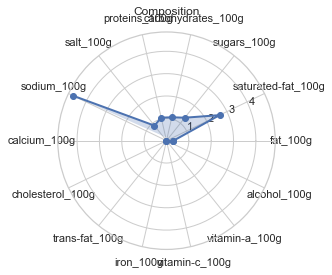

In [190]:
plot_radar(relative_metrics)


# repartition energétique

In [191]:
# print repas
sample_c = get_kcal(metrics_brut)

In [192]:
sample_c.describe()

count      3.000000
mean      69.726667
std       67.394879
min       29.880000
25%       30.820000
50%       31.760000
75%       89.650000
max      147.540000
dtype: float64

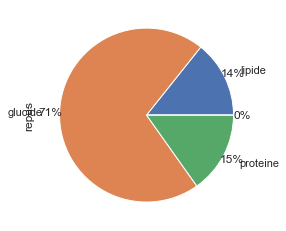

In [193]:
sample_c.plot.pie(label="repas", autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

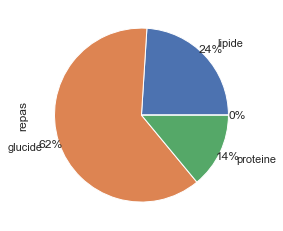

In [194]:
# print reference
sample_c = get_kcal(reference)
sample_c.plot.pie(label="repas", autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)